In [163]:
import json
import numpy as np
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow import keras
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Loading the data:

In [23]:
data_path = "music_ins_mfcc.json"
test_size = 0.25
validation_size = 0.2
with open(data_path, "r") as f:
    data = json.load(f)
X = np.array(data["mfcc"])
y = np.array(data["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size)

#Adding the 4th axis to replicate an image with one channel. To math the TF expectation for CNN model.
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]
X_val = X_val[...,np.newaxis]

In [164]:
#Creating the input_shape tuple to feed into the CNN model
print("Original shape of X_train is",X_train.shape)
print("Original shape of y_train is",y_train.shape)
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
print("Input shape for the CNN model is:", input_shape)
print(y_train.max())


Original shape of X_train is (25386, 130, 20, 1)
Original shape of y_train is (25386,)
Input shape for the CNN model is: (130, 20, 1)
28


In [165]:
def build_model(input_shape):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32,(3,3),activation="relu", input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(29, activation='softmax'))
    return model
    

In [166]:
if __name__ == "__main__":
    class_model = build_model(input_shape)
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    class_model.compile(optimizer = optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    history_values = class_model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=32, epochs=15)
    

/opt/anaconda3/envs/tensorflow-bala/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 54s 64ms/step - accuracy: 0.5932 - loss: 1.5202 - val_accuracy: 0.8667 - val_loss: 0.4839
Epoch 2/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.8258 - loss: 0.6002 - val_accuracy: 0.8984 - val_loss: 0.3448
Epoch 3/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.8726 - loss: 0.4452 - val_accuracy: 0.9242 - val_loss: 0.2713
Epoch 4/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.8977 - loss: 0.3495 - val_accuracy: 0.9348 - val_loss: 0.2394
Epoch 5/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.9129 - loss: 0.2880 - val_accuracy: 0.9414 - val_loss: 0.2069
Epoch 6/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.9259 - loss: 0.2433 - val_accuracy: 0.9449 - val_loss: 0.1937
Epoch 7/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.9370 - loss: 0.2169 - val_accuracy: 0.9463 - val_loss: 0.1884
Epoch 8/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - accuracy: 0.9424 - loss: 0.1925 -

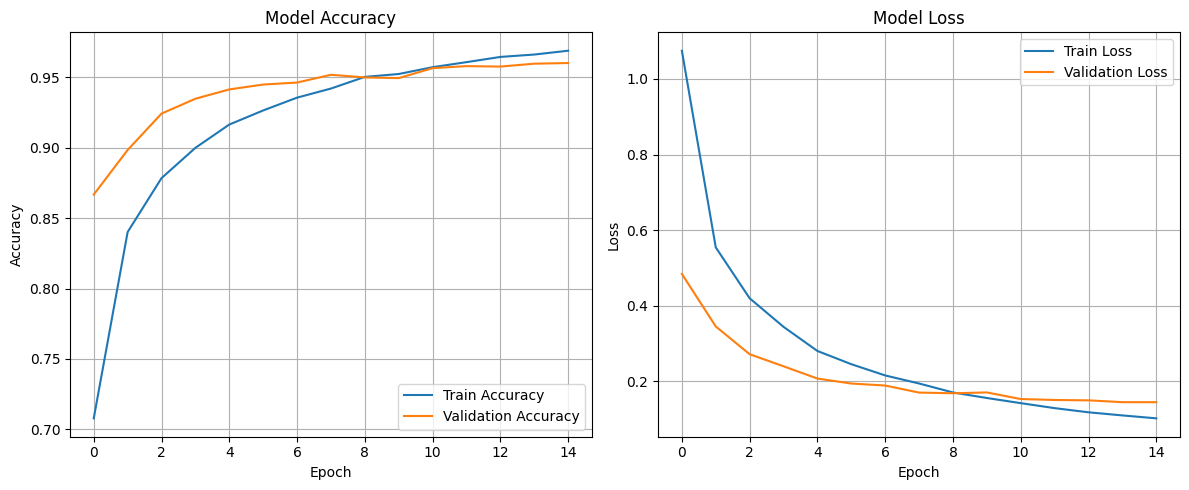

In [167]:
# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_values.history['accuracy'], label='Train Accuracy')
plt.plot(history_values.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_values.history['loss'], label='Train Loss')
plt.plot(history_values.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [168]:
print(X_test.shape)
X1 = X_test[100]
print(X1.shape)

print(type(X_test))

(10578, 130, 20, 1)
(130, 20, 1)
<class 'numpy.ndarray'>


In [169]:
def predict(model,X,y):
    #print(X.shape)
    #print(type(X))
    if isinstance(X, tf.Tensor):
        X = X.numpy()
    else:
        X = np.array(X)
    X= X[np.newaxis, ...]
    #print(X.shape)
    #print(type(X))
    prediction = model.predict(X, verbose=0)
    predicted_index = np.argmax(prediction, axis=1)
    prediction_value = predicted_index[0]
    return prediction_value


In [185]:
y_true = []
y_pred = []
for i in range(10578):  # Iterate over the first 100 samples
    X = X_test[i]
    y = y_test[i]
    predicted_label = predict(class_model, X, y)  # This function now returns the predicted label
    #print(predicted_label,y)
    y_true.append(y)  # Collect actual labels
    y_pred.append(predicted_label)  # Collect predicted labels
    
precision = precision_score(y_true, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='macro')       # Similar to above
f1 = f1_score(y_true, y_pred, average='macro')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")




Precision: 0.9275
Recall: 0.9027
F1 Score: 0.9129


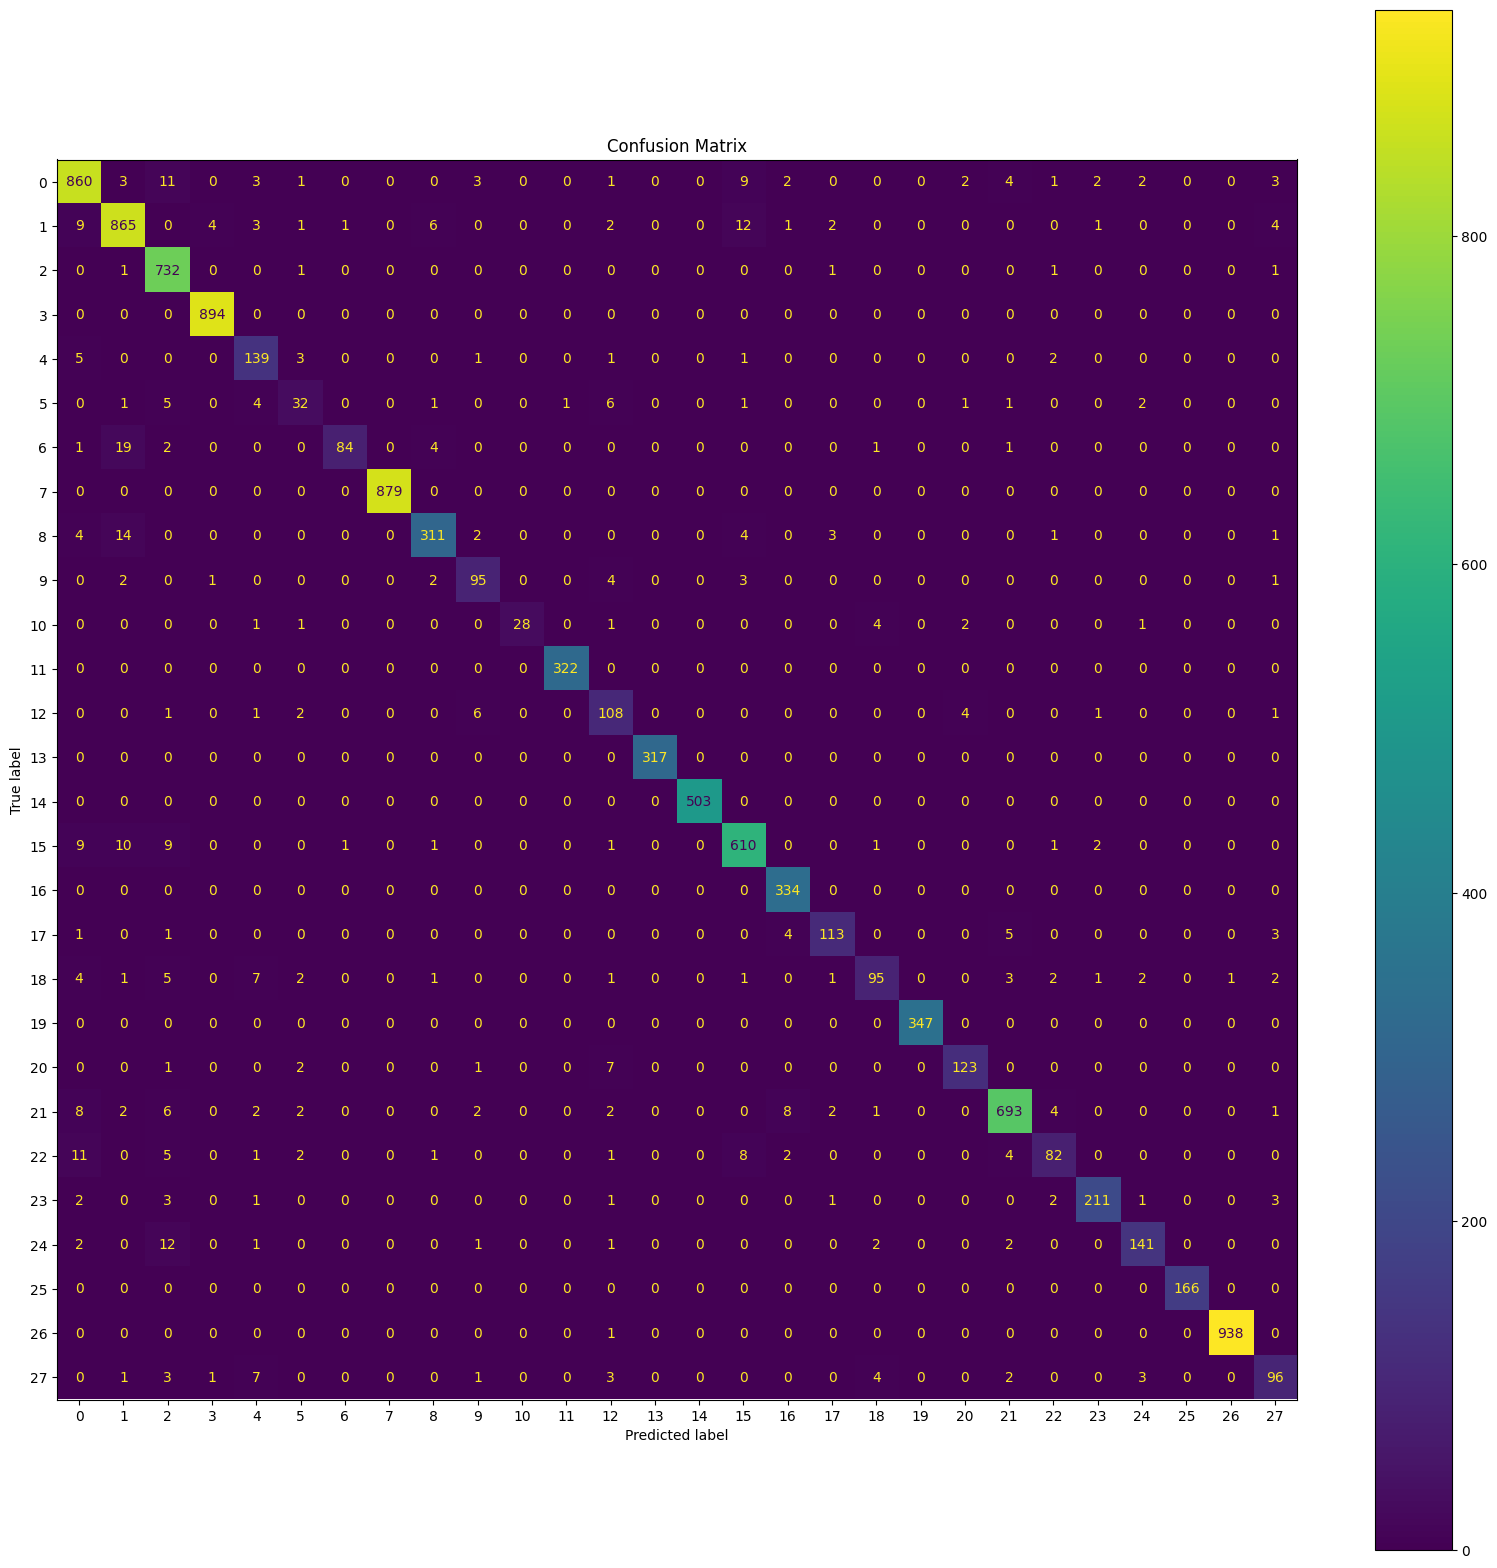

In [186]:
ins = np.array(data["instrument"])
ins_true = []
ins_pred = []

# During the data prep Label's were created from 1 to 28 instead of 0 to 27. So "index-1" is applied below.
for _, index in enumerate(y_true):
    instrument_name = ins[index-1]
    ins_true.append(instrument_name)
    
for _, index in enumerate(y_pred):
    instrument_name = ins[index-1]
    ins_pred.append(instrument_name)

# Calculate confusion matrix
cm = confusion_matrix(ins_true, ins_pred)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Make the figure larger
fig, ax = plt.subplots(figsize=(20, 20))

# Plot without showing numbers
disp.plot(cmap='viridis', ax=ax, colorbar=True, values_format=None)

# Add title
plt.title('Confusion Matrix')

# Show plot
plt.show()